# Simulación TP5: Familias de Curvas con Distribuciones de Parámetros

En este notebook, generaremos familias de curvas con distribuciones normales y uniformes 
de parámetros iniciales para analizar el efecto en el calentamiento del fluido.

Específicamente, trabajaremos con:

1. Distribución uniforme de 5 valores próximos de resistencias
2. Distribución normal de 5 temperaturas iniciales del agua (Media 10°C, SD 5°C)
3. Distribución uniforme de 8 temperaturas iniciales del ambiente (entre -20°C y 50°C)
4. Distribución normal de 5 valores de tensión de alimentación (Media 12V, SD 4V)
5. Simulación que combine todas las familias de curvas anteriores

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.integrate import odeint
from math import pi
import random
import matplotlib
# Configuración para gráficos más estéticos
matplotlib.style.use('ggplot')

# Configuración para reproducibilidad
np.random.seed(42)
random.seed(42)

## Parámetros Base del Sistema

In [3]:
# Parámetros geométricos (del TP3)
DIAMETRO = 8.0  # cm
ALTURA = 15.0   # cm
RADIO = DIAMETRO / 2  # cm
VOLUMEN = pi * (RADIO**2) * ALTURA  # cm^3
CAPACIDAD = VOLUMEN / 1000  # litros

# Parámetros del aislante (del TP3)
ESPESOR_AISLANTE = 0.25  # cm
COEF_CONDUCTIVIDAD_TERMICA = 0.04  # W/(m·K) - Fibra de vidrio

# Conversión a metros para los cálculos
RADIO_M = RADIO / 100  # m
ALTURA_M = ALTURA / 100  # m
ESPESOR_M = ESPESOR_AISLANTE / 100  # m

# Cálculo de la superficie
SUP_LATERAL = 2 * pi * RADIO_M * ALTURA_M  # m^2
SUP_BASES = 2 * pi * RADIO_M**2  # m^2
SUP_TOTAL = SUP_LATERAL + SUP_BASES  # m^2

# Cálculo del coeficiente de pérdida de calor
PERDIDA_CALOR = COEF_CONDUCTIVIDAD_TERMICA * SUP_TOTAL / ESPESOR_M  # W/K

# Parámetros eléctricos (valores base)
VOLTAJE_BASE = 12.0  # V
RESISTENCIA_BASE = 0.23  # Ohms
POTENCIA_BASE = VOLTAJE_BASE**2 / RESISTENCIA_BASE  # W

# Parámetros del fluido
DENSIDAD_AGUA = 1.0  # kg/L
MASA_AGUA = CAPACIDAD * DENSIDAD_AGUA  # kg
CALOR_ESPECIFICO_AGUA = 4180  # J/(kg·°C)
TEMP_INICIAL_BASE = 20.0  # °C
TEMP_AMBIENTE_BASE = 20.0  # °C
TEMP_OBJETIVO = 80.0  # °C

# Tiempo y discretización
TIEMPO_TOTAL = 600  # segundos
INTERVALO = 5  # segundos

# Crear arreglo de tiempo con intervalos definidos
tiempo = np.arange(0, TIEMPO_TOTAL + 1, INTERVALO)

## A. Distribución Uniforme de 5 Valores de Resistencia

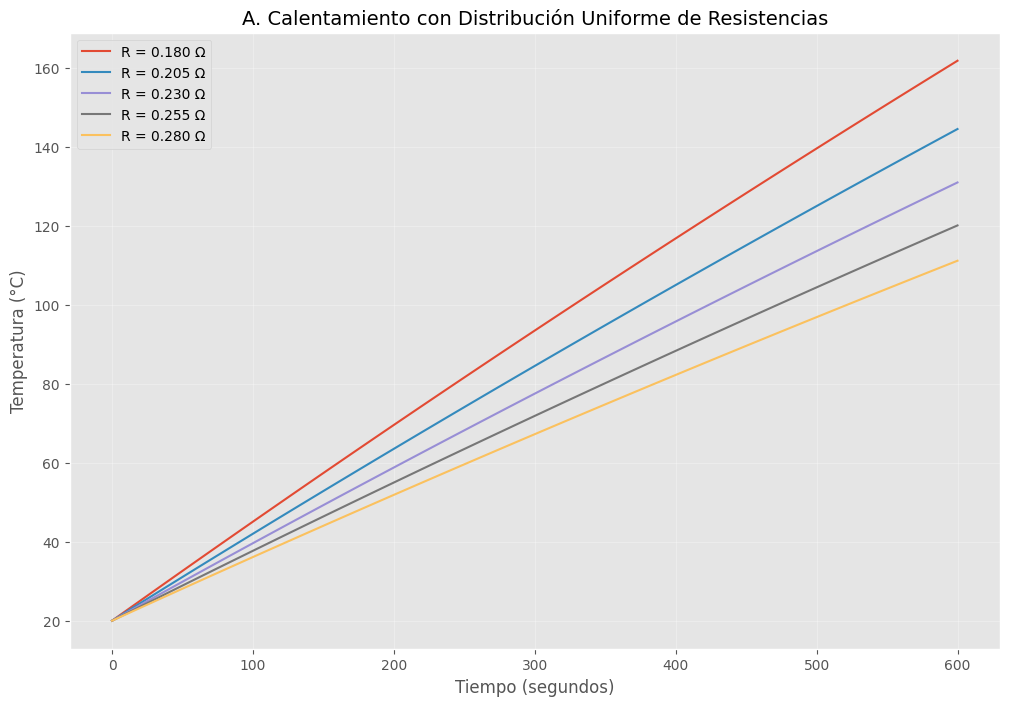

In [4]:
# Definimos 5 valores próximos de resistencia (distribución uniforme)
valores_resistencia = np.linspace(RESISTENCIA_BASE - 0.05, RESISTENCIA_BASE + 0.05, 5)

# Creamos la figura para la familia de curvas
plt.figure(figsize=(12, 8))

# Simulamos para cada valor de resistencia
for resistencia in valores_resistencia:
    # Calculamos la potencia para esta resistencia
    potencia = VOLTAJE_BASE**2 / resistencia  
    
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = TEMP_INICIAL_BASE
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor
        perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE_BASE)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = potencia - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos
    plt.plot(tiempo, temperaturas, label=f"R = {resistencia:.3f} Ω")

# Configuración del gráfico
plt.title("A. Calentamiento con Distribución Uniforme de Resistencias", fontsize=14)
plt.xlabel("Tiempo (segundos)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.savefig('tp5_a_resistencias.png')
plt.show()

## B. Distribución Normal de 5 Temperaturas Iniciales del Agua

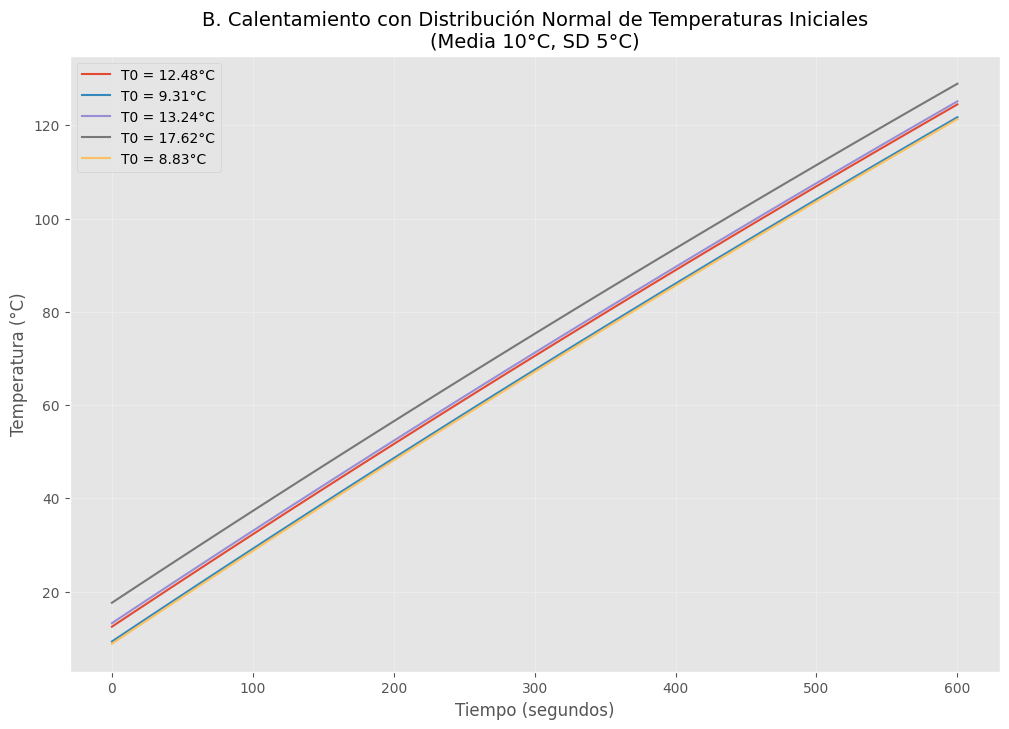

In [5]:
# Generamos 5 temperaturas iniciales con distribución normal (media 10, desviación estándar 5)
MEDIA_TEMP_INICIAL = 10
SD_TEMP_INICIAL = 5
temperaturas_iniciales = np.random.normal(MEDIA_TEMP_INICIAL, SD_TEMP_INICIAL, 5)

# Creamos la figura para la familia de curvas
plt.figure(figsize=(12, 8))

# Simulamos para cada temperatura inicial
for temp_inicial in temperaturas_iniciales:
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = temp_inicial
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor
        perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE_BASE)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = POTENCIA_BASE - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos
    plt.plot(tiempo, temperaturas, label=f"T0 = {temp_inicial:.2f}°C")

# Configuración del gráfico
plt.title("B. Calentamiento con Distribución Normal de Temperaturas Iniciales\n(Media 10°C, SD 5°C)", fontsize=14)
plt.xlabel("Tiempo (segundos)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.savefig('tp5_b_temp_iniciales.png')
plt.show()

## C. Distribución Uniforme de 8 Temperaturas Iniciales del Ambiente

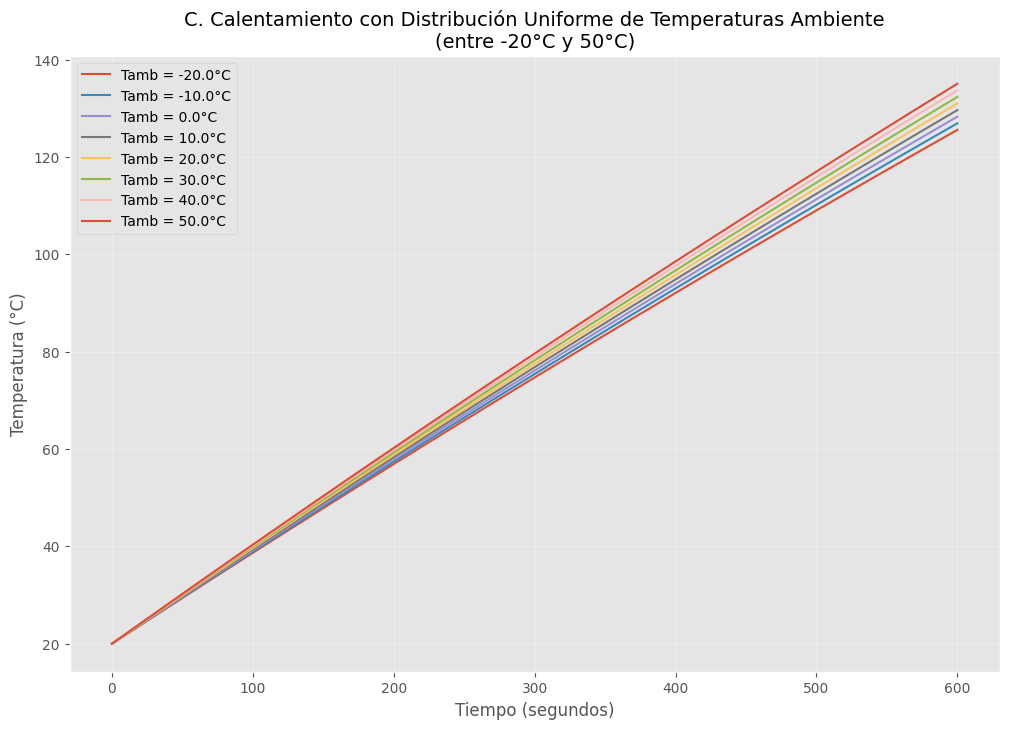

In [6]:
# Generamos 8 temperaturas ambiente uniformes entre -20 y 50 grados
temperaturas_ambiente = np.linspace(-20, 50, 8)

# Creamos la figura para la familia de curvas
plt.figure(figsize=(12, 8))

# Simulamos para cada temperatura ambiente
for temp_ambiente in temperaturas_ambiente:
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = TEMP_INICIAL_BASE
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor respecto a la temperatura ambiente
        perdida_w = PERDIDA_CALOR * (temperatura_actual - temp_ambiente)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = POTENCIA_BASE - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos
    plt.plot(tiempo, temperaturas, label=f"Tamb = {temp_ambiente:.1f}°C")

# Configuración del gráfico
plt.title("C. Calentamiento con Distribución Uniforme de Temperaturas Ambiente\n(entre -20°C y 50°C)", fontsize=14)
plt.xlabel("Tiempo (segundos)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.savefig('tp5_c_temp_ambiente.png')
plt.show()

## D. Distribución Normal de 5 Valores de Tensión de Alimentación

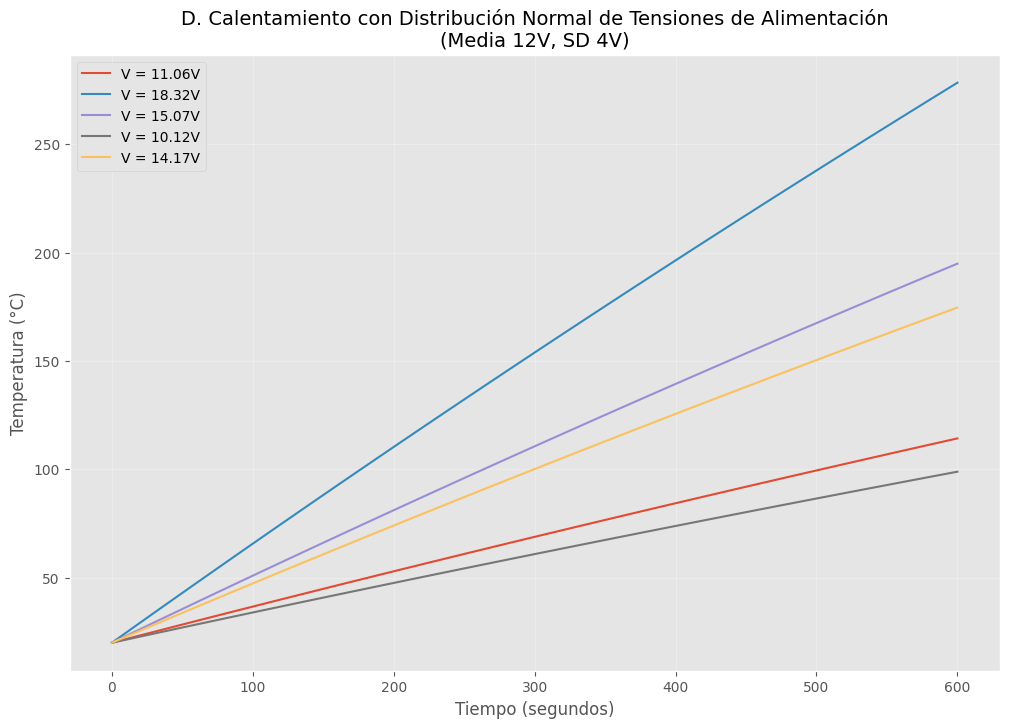

In [7]:
# Generamos 5 tensiones de alimentación con distribución normal (media 12, desviación estándar 4)
MEDIA_TENSION = 12
SD_TENSION = 4
tensiones = np.random.normal(MEDIA_TENSION, SD_TENSION, 5)

# Función para resolver la ecuación diferencial del calentamiento
def modelo_calentamiento(T, t, V, R, masa, c_esp, k_perdida, T_amb):
    # Cálculo de la potencia
    potencia = V**2 / R
    
    # Pérdida de calor
    perdida = k_perdida * (T - T_amb)
    
    # Tasa de cambio de temperatura
    dTdt = (potencia - perdida) / (masa * c_esp)
    
    return dTdt

# Creamos la figura para la familia de curvas
plt.figure(figsize=(12, 8))

# Simulamos para cada tensión de alimentación
for tension in tensiones:
    # Aseguramos que la tensión sea positiva (evitamos valores negativos por la distribución normal)
    if tension <= 0:
        continue
        
    # Resolvemos el modelo con la tensión específica
    resultado = odeint(
        modelo_calentamiento, 
        TEMP_INICIAL_BASE, 
        tiempo, 
        args=(tension, RESISTENCIA_BASE, MASA_AGUA, CALOR_ESPECIFICO_AGUA, PERDIDA_CALOR, TEMP_AMBIENTE_BASE)
    )
    
    # Graficamos
    plt.plot(tiempo, resultado[:, 0], label=f"V = {tension:.2f}V")

# Configuración del gráfico
plt.title("D. Calentamiento con Distribución Normal de Tensiones de Alimentación\n(Media 12V, SD 4V)", fontsize=14)
plt.xlabel("Tiempo (segundos)", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.savefig('tp5_d_tensiones.png')
plt.show()

## E. Simulación con Todas las Familias de Curvas

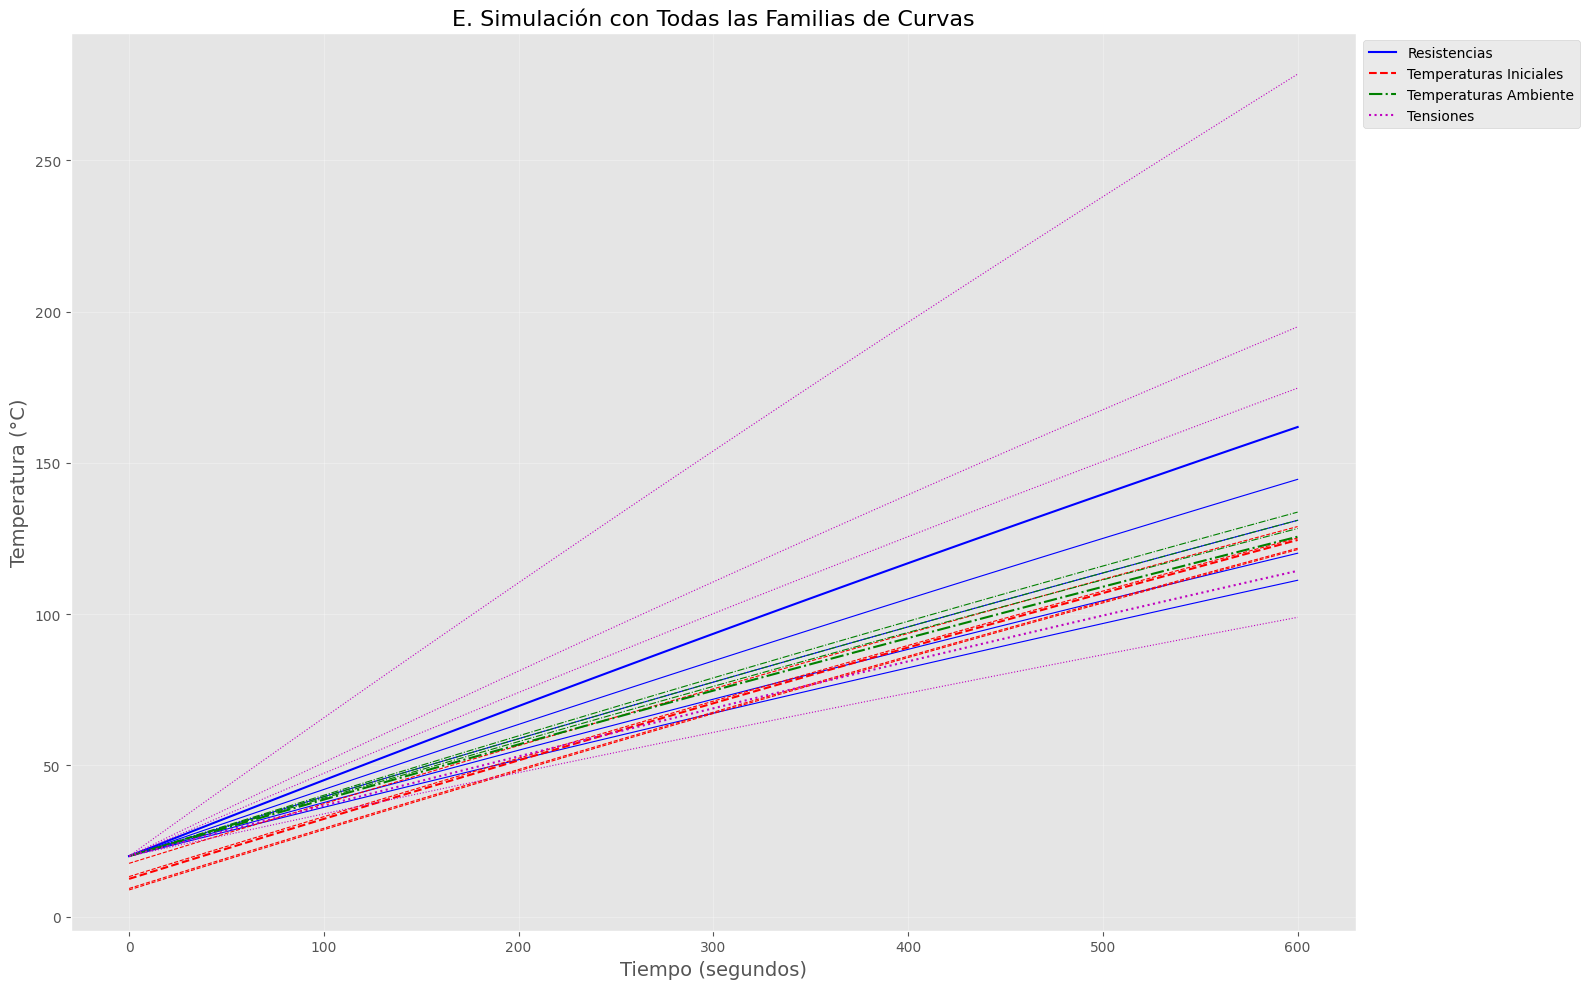

In [8]:
# Creamos la figura para todas las curvas
plt.figure(figsize=(16, 10))

# 1. Valores de resistencia
for i, resistencia in enumerate(valores_resistencia):
    # Calculamos la potencia para esta resistencia
    potencia = VOLTAJE_BASE**2 / resistencia  
    
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = TEMP_INICIAL_BASE
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor
        perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE_BASE)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = potencia - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos con línea continua azul
    plt.plot(tiempo, temperaturas, 'b-', linewidth=1.5 if i == 0 else 0.8, 
             label=f"R = {resistencia:.3f} Ω" if i == 0 else None)

# 2. Temperaturas iniciales
for i, temp_inicial in enumerate(temperaturas_iniciales):
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = temp_inicial
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor
        perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE_BASE)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = POTENCIA_BASE - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos con línea punteada roja
    plt.plot(tiempo, temperaturas, 'r--', linewidth=1.5 if i == 0 else 0.8,
             label=f"T0 = {temp_inicial:.2f}°C" if i == 0 else None)

# 3. Temperaturas ambiente - mostramos solo algunas para no saturar el gráfico
for i, temp_ambiente in enumerate(temperaturas_ambiente[::2]):  # Tomamos una de cada dos
    # Listas para almacenar las temperaturas con pérdidas
    temperaturas = []
    
    # Simulación iterativa con pérdidas
    temperatura_actual = TEMP_INICIAL_BASE
    for t in tiempo:
        # Guardamos temperatura actual
        temperaturas.append(temperatura_actual)
        
        # Calculamos pérdida de calor respecto a la temperatura ambiente
        perdida_w = PERDIDA_CALOR * (temperatura_actual - temp_ambiente)
        
        # Potencia efectiva = Potencia total - Pérdidas
        potencia_efectiva = POTENCIA_BASE - perdida_w
        
        # Incremento de temperatura en este intervalo
        delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
        
        # Nueva temperatura
        temperatura_actual = temperatura_actual + delta_t
    
    # Graficamos con línea a trazos verdes
    plt.plot(tiempo, temperaturas, 'g-.', linewidth=1.5 if i == 0 else 0.8,
             label=f"Tamb = {temp_ambiente:.1f}°C" if i == 0 else None)

# 4. Tensiones
for i, tension in enumerate(tensiones):
    # Aseguramos que la tensión sea positiva
    if tension <= 0:
        continue
        
    # Resolvemos el modelo con la tensión específica
    resultado = odeint(
        modelo_calentamiento, 
        TEMP_INICIAL_BASE, 
        tiempo, 
        args=(tension, RESISTENCIA_BASE, MASA_AGUA, CALOR_ESPECIFICO_AGUA, PERDIDA_CALOR, TEMP_AMBIENTE_BASE)
    )
    
    # Graficamos con línea magenta
    plt.plot(tiempo, resultado[:, 0], 'm:', linewidth=1.5 if i == 0 else 0.8,
             label=f"V = {tension:.2f}V" if i == 0 else None)

# Configuración del gráfico
plt.title("E. Simulación con Todas las Familias de Curvas", fontsize=16)
plt.xlabel("Tiempo (segundos)", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.grid(True, alpha=0.3)

# Creamos una leyenda personalizada para claridad
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='b', linestyle='-', label='Resistencias'),
    Line2D([0], [0], color='r', linestyle='--', label='Temperaturas Iniciales'),
    Line2D([0], [0], color='g', linestyle='-.', label='Temperaturas Ambiente'),
    Line2D([0], [0], color='m', linestyle=':', label='Tensiones')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('tp5_e_todas_las_curvas.png')
plt.show()

## Conclusiones

1. **Efecto de la resistencia**: Al variar la resistencia, se modifica directamente la potencia del sistema. Menores valores de resistencia generan mayor potencia y, por tanto, un calentamiento más rápido.

2. **Efecto de la temperatura inicial**: Las curvas con menor temperatura inicial requieren más tiempo para alcanzar una temperatura objetivo, aunque todas tienden a converger a largo plazo.

3. **Efecto de la temperatura ambiente**: La temperatura ambiente afecta significativamente el comportamiento térmico del sistema:
   - En ambientes muy fríos, la pérdida de calor es mayor, reduciendo la eficiencia del calentamiento
   - En ambientes cálidos, el sistema calienta más rápido al tener menores pérdidas térmicas

4. **Efecto de la tensión**: La tensión afecta cuadráticamente a la potencia (P = V²/R), por lo que pequeñas variaciones en la tensión pueden producir cambios significativos en la velocidad de calentamiento.

5. **Análisis global**: El sistema muestra una sensibilidad variable a los distintos parámetros:
   - La tensión y la resistencia (parámetros eléctricos) determinan la potencia y tienen un impacto directo en la velocidad de calentamiento
   - Las condiciones térmicas iniciales (temperatura del agua y ambiente) influyen en la forma de la curva y en la eficiencia del proceso

Estas simulaciones permiten comprender mejor el comportamiento del sistema bajo diferentes condiciones y prever su desempeño en diversos escenarios de operación.